# TITANIC DATASET 

# BY (DENNIS MUIGO)

# INTRODUCTION 

The titanic.csv file contains data for 891 passengers on the Titanic. Each row represents one person. The columns describe different attributes about the person including whether they survived, their age, their on-board class, their sex, and the fare they paid

# Understanding the context
The titanic dataset has 12 columns:

Survived - Survival (0 = No; 1 = Yes)

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name - Name

Sex - Sex

Age - Age

SibSp - Number of Siblings/Spouses Aboard

Parch - Number of Parents/Children Aboard

Ticket - Ticket Number

Fare - Passenger Fare (British pound)

Cabin - Cabin

Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# The main feature of interest in this dataset is to know the number of survivors 

I am most interested in features that will predict passengers who survived.

Those features are Age, Fare, and class.

# Preliminary Wrangling

In [16]:
#loading of libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Understanding the data abit more

In [6]:
titanic = pd.read_csv("train (5).csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data cleaning

In [8]:
# Dealing with the Missing Data
# Taking care of missing values
# So let's just go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:
# ---
# Survived - This variable is obviously relevant.
# Pclass - Does a passenger's class on the boat affect their survivability?
# Sex - Could a passenger's gender impact their survival rate?
# Age - Does a person's age impact their survival rate?
# SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probability
# Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probability
# Fare - Does the fare a person paid effect his survivability? Maybe - let's keep it.
# Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it.
# What about a person's name, ticket number, and passenger ID number? They're irrelavant for predicting survivability. 
# And as we recall, the cabin variable is almost all missing values, so we can just drop all of these.
#
titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# So let's write a function that finds each null value in the Age variable, and for each null, 
# checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.

def age_approx(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [10]:
# When we apply the function and check again for null values, we see that there are no more null values in the age variable.
#
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#dropping the cabin column
titanic.drop(columns='Cabin', inplace=True)

In [13]:

# There are 2 null values in the embarked variable. We can drop those 2 records 
# without loosing too much important information from our dataset, so we will do that.
#
titanic.dropna(inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
titanic.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

# 2.0 Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: Survived.

# 2.1 code : 1

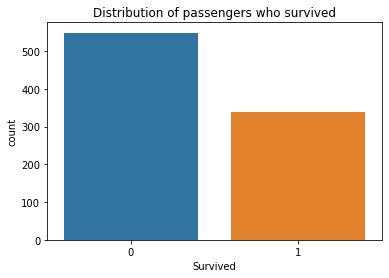

In [19]:
sns.countplot(data = titanic, x = 'Survived')
plt.title("Distribution of passengers who survived");

In [20]:
titanic.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

# 2.2 Observation

From the observation we can see majority of passengers did not survive, 549 did not make it compared to 340 who survived


# 2.3.0 Define

How passengers were ditributed according to their classes

# 2.3.1 code: 2

In [31]:
Pclass = titanic.Pclass.value_counts()
Pclass_order = Pclass.index

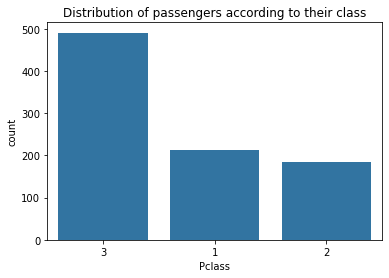

In [34]:
base_color = sns.color_palette()[0]

sns.countplot(data = titanic, x = 'Pclass', color = base_color, order = Pclass_order)
plt.title("Distribution of passengers according to their class");

In [36]:
Pclass

3    491
1    214
2    184
Name: Pclass, dtype: int64

# 2.3.2 Observation 

Third class had many passengers with 491, followed by first class with 214 passengers and second class had 184 passengers

# 2.4.0 Define 

What was the age distribution among passengers in the Titanic?

# 2.4.1 code: 3

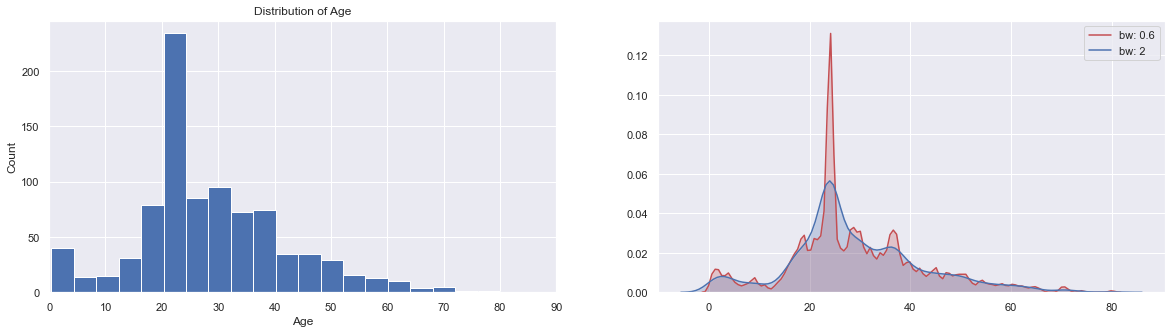

In [52]:

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
ax1.hist(titanic.Age, bins=20)
ax1.set_xlim(0,90)
ax1.set_title('Distribution of Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

#plotting kernel density estimation to see the shape of distribution
ax2 = sns.kdeplot(titanic.Age, bw=0.6, label="bw: 0.6", shade=True, color="r");
ax2 = sns.kdeplot(titanic.Age, bw=2, label="bw: 2", shade=True);



# 2.4.2 Observation

From the above figure we can see those passengers with age 20-30 were majority in the titanic. 
From the kde by estimation those passengers with age between 20-40 constitute about 70% of the population
for purposes of readabilty we create virtue bins and replace ranges with categories

# 2.4.3 code: 4

<ipython-input-47-85cd44228809>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


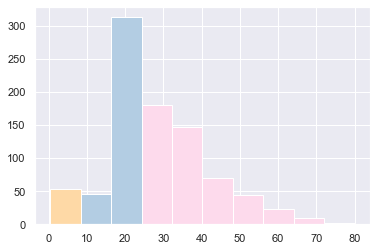

In [47]:
# set the colors
cmap = plt.get_cmap('Pastel1')
young = cmap(0.5)
middle = cmap(0.2)
older = cmap(0.8)

# get the object we will change - patches is an array with len: num of bins
fig, ax = plt.subplots()
y_values, bins, patches = ax.hist(titanic.Age, 10)

[patches[i].set_facecolor(young) for i in range(0,1)] # bin 0
[patches[i].set_facecolor(middle) for i in range(1,3)] # bins 1 and 2
[patches[i].set_facecolor(older) for i in range(3,10)] # 7 remaining bins 

ax.grid(True)
fig.show();

# 2.4.4 Observation  

Those Passengers aged 20 were many followed by 30 years and 40 years.


# 2.5.0 Define

Checking how fare was distributed.

# 2.5.1 code:5

In [56]:
np.log10(titanic.Fare.describe())

C:\Users\MAUREEN\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    2.948902
mean     1.506460
std      1.696335
min          -inf
25%      0.897396
50%      1.159994
75%      1.491362
max      2.709549
Name: Fare, dtype: float64

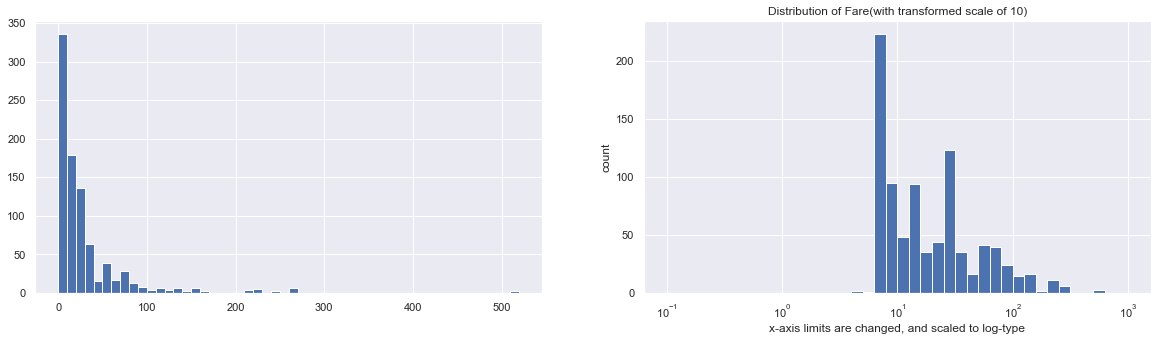

In [62]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

plt.subplot(1, 2, 1) 
bins_1 = np.arange(0, titanic['Fare'].max()+10, 10)
plt.hist(data = titanic, x = 'Fare', bins = bins_1)

# Axis transformation
# Bin size
plt.subplot(1,2,2)
bins_2 = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=titanic, x='Fare', bins=bins_2)
plt.xlabel('Fare')
plt.ylabel('count')
plt.title('Distribution of Fare')

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type')
plt.title('Distribution of Fare(with transformed scale of 10)');


# 2.5.2 Observation

The distribution of fare is skewed to the right. After performing transformation scale of logarithimic the distribution is more clear that it is skewed towards the right.


# Checking the correlation in the dataset using heatmap

In [116]:
titanic.drop(columns = 'PassengerId', inplace = True)

In [117]:
corr = titanic.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


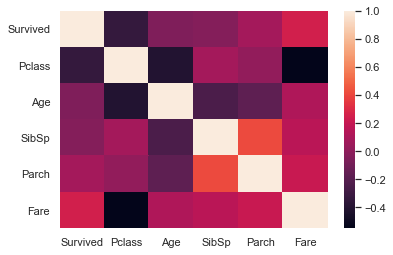

In [118]:
#plotting the correlation in a heatmap
sns.heatmap(corr);

# Observation 

There is fairly positive relationship between siblings and parents aboard 
Also a negative linear relationship between the passengers class and Fare

# Bivariate distribution

we will be checking relationship between two variables

# 2.6.0 Define

 Did more young people or older ones get first class tickets on the Titanic?
 
 # 2.6.1 code: 6

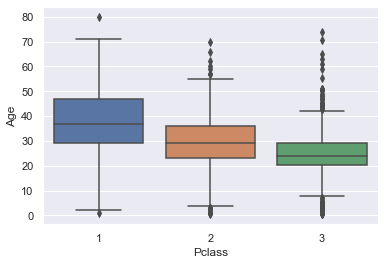

In [65]:
# two variables seaborn
ax = sns.boxplot(x="Pclass", y="Age", data=titanic)


# 2.6.2 Observation 

From the above boxplot we can see those passengers aged 30-50 got the first class, and those mid twenties to mid thirties were in second class and third class was occupied by those in there 20-30

# 2.7.0 Define

Which class in our dataset had many survivors?

# 2.7.1 code : 7

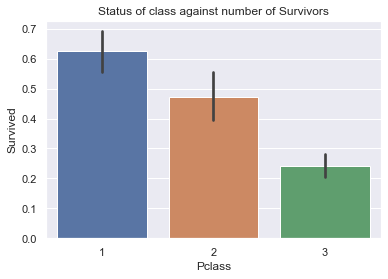

In [75]:
#we can make an observation that the status of the class determined the number of survivors
sns.barplot(x = 'Pclass', y='Survived',data=titanic)
plt.title("Status of class against number of Survivors");

In [119]:
y = titanic.groupby('Pclass')['Survived'].sum()
y

Pclass
1    134
2     87
3    119
Name: Survived, dtype: int64

# 2.7.2 Observation

passengers who survived more according to the class they boarded were FIrst class, followed by Second and third class had few number of survivors

# 2.8.0 Define

Checking the correlation between fare and age using scatter plot

# 2.8.1 code: 8

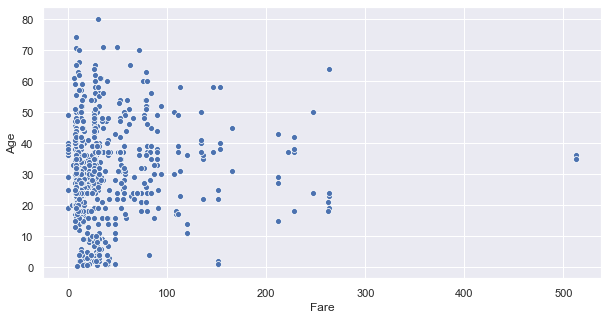

In [88]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="Fare", y="Age", data=titanic, ax=ax); 


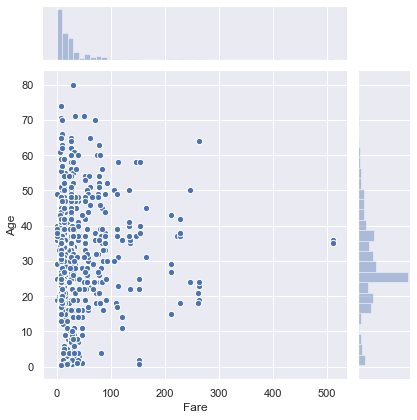

In [92]:
sns.jointplot("Fare", "Age", data=titanic, s=40, edgecolor="w", linewidth=1);

# 2.8.2 Observation

The two variables are not linearly correlated.

# 2.9.0 Define

Violin plot for plotting a Quantitative variable (Fare) versus Qualitative variable (Pclass)

# 2.9.1 code: 9 


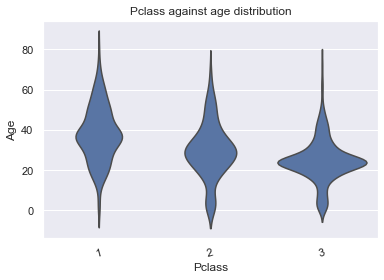

In [96]:
base_color = sns.color_palette()[0]
sns.violinplot(data=titanic, x='Pclass', y='Age', color = base_color, inner = None);
plt.xticks(rotation = 15)
plt.title('Pclass against age distribution');


# 2.9.2 Observation 

For each of the passenger class an area is plotted that show an area is plotted that shows an approximate age for passenger class. Those passengers who were on Third class  majority of them were below 30 years.

# 3.0 Define

Checking how different passengers across the three classes survived

# 3.1 code:  10

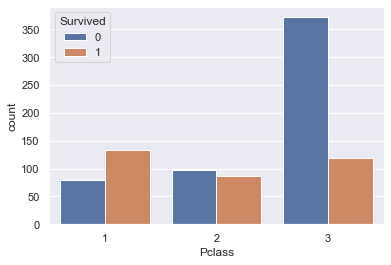

In [97]:
#plotting the countplot
sns.countplot(data = titanic, x = 'Pclass', hue = 'Survived');

# 3.1.1 Observation

grouped with classes, first class number of passengers who survived exceeded those who did not survive, while those in the second class were farely balanced between survivors and non-survivors. For the third class is where majority succumbed to the tragic.


# 3.2.0 Define

investigating how passengers survived interms of gender

# 3.2.1 code : 11

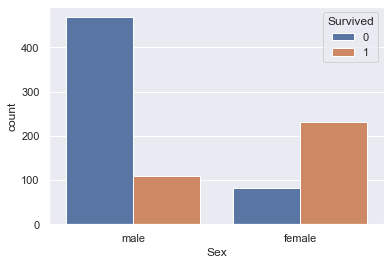

In [99]:
sns.countplot(data = titanic, x = 'Sex', hue = 'Survived');

In [103]:
g = titanic.groupby('Sex')['Survived'].sum()
g

Sex
female    231
male      109
Name: Survived, dtype: int64

In [105]:
titanic.shape

(889, 11)

# 3.2.2 Observation 

The number of male who survived was 109 passengers, while the females who survived were 231.

More females survived than males.


# 4.0 Multivariate distribution

Investigating more than two variables in our dataset

# 4.1 Define

Distribution of three variables, Fare, age, and survived

# 4.1.1 code: 12

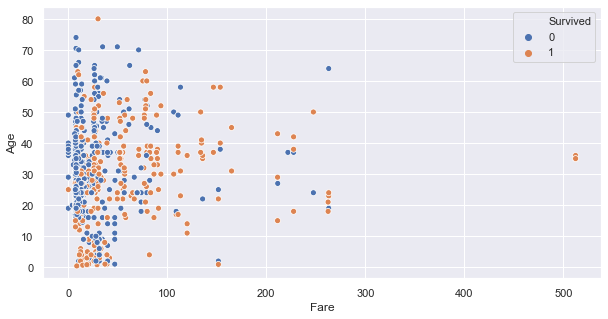

In [106]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="Fare", y="Age", hue="Survived", data=titanic, ax=ax);

# 4.1.2 Observation

From the above observation we can see that when there is unit of fare increment no huge correlation with age.
both age and fare are weakly correlated but they are variables affecting chances of survivor.

# 4.2.0 Define 

Correlation for 4 variables i.e age,fare,survived, and sex

# 4.2.1 code: 13

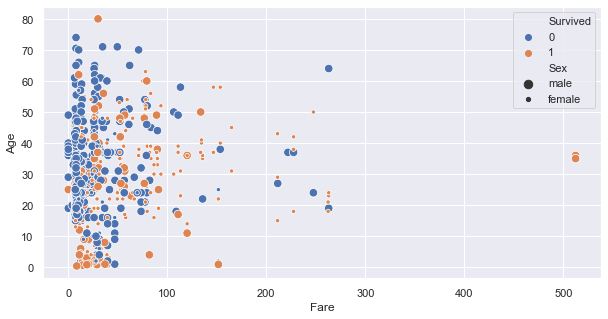

In [108]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="Fare", y="Age", hue="Survived", size="Sex", data=titanic, ax=ax);

# 4.2.2 Observation

The qualitative and quantitative relationship between the four variables can be seen. The number of male who were aged 20-40 did not survive. From the obsevation blue is many than orange, showing males died more than females.

# TAKE AWAY

After a close examination in  our dataset, the two qualitative variables, Pclass and Sex had a linear relationship with the number of survivors in the titanic.

First class had the highest number of survivors 134 of them, followed by third class with 119 and second class had 87 survivors.

Females survived more than males